In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data

The energy and water data can be downloaded from the following webpage:

https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/7x5e-2fxh/about_data

In [ ]:
# Import data from Google Drive

from google.colab import drive
drive.mount('/content/drive')

energy_water_data = pd.read_csv('/content/drive/MyDrive/mlc_projects/data/raw/local_law_84.csv')

In [ ]:
# Import data from local drive

# data = pd.read_csv('data/local_law_84.csv', low_memory=False)
# energy_water_data = data.copy()

# Explore Data Structure
Display the first few rows of the datasets to understand the structure and format of the data.

Check the data types of each column (numeric, categorical, date, etc.).

Inspect the dimensions of the datasets (number of rows and columns).

In [ ]:
energy_water_data.shape

(29842, 249)

In [ ]:
energy_water_data.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,...,Number of Active IT Meters,Generation Date,Submission Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Borough
0,21205224,Astoria Blvd Property,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,4006520042,4538607,36-16 Astoria Blvd.,Long Island City,11103,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.769272,-73.913633,401.0,22.0,6502.0,Astoria,QUEENS
1,2665352,Stellar - 70 West 93rd Street,20599688,Stellar - Campus West 93rd Street,12/31/2021,1-01206-0001,1031627,70 West 93rd Street,New York,10025,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.790503,-73.967920,107.0,6.0,177.0,Upper West Side,MANHATTAN
2,2665400,Stellar - 28-50 West 97th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-01832-0043,1055265,28-50 West 97th Street,New York,10025,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.792758,-73.965171,107.0,7.0,181.0,Upper West Side,MANHATTAN
3,2665405,Stellar - 310 Greenwich St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-00142-0025,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,New York,10013,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2665415,Stellar - 87 Hamilton Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-02072-0039,1061772,87 Hamilton Place,New York,10031,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.823008,-73.950670,109.0,7.0,225.0,Hamilton Heights,MANHATTAN


In [ ]:
energy_water_data.dtypes

Property Id               int64
Property Name            object
Parent Property Id       object
Parent Property Name     object
Year Ending              object
                         ...   
Community Board         float64
Council District        float64
Census Tract            float64
NTA                      object
Borough                  object
Length: 249, dtype: object

Based on the output above, we can see that the majority of the columns are stored as string objects.

Many of the rows are categorical, but many others are numerical and still require conversion

We will need to convert relevant rows to the appropriate data type before processing.

We need to work together to determine what features we want to keep **OR** determine what features we definitely don't want and drop them.

We also need to determine how we will sample this dataset.
- Which property types do we want to include?
- Do we only want buildings that have received ENERGY STAR rating?



# Clean Data

In [ ]:
selected_columns = ['Property Id',
                    'Parent Property Id',
                    'City',
                    'Postal Code',
                    'National Median Reference Property Type',
                    'Largest Property Use Type',
                    'Largest Property Use Type - Gross Floor Area (ft²)',
                    'Year Built',
                    'Construction Status',
                    'Number of Buildings',
                    'Occupancy',
                    'Metered Areas (Energy)',
                    'ENERGY STAR Score',
                    'National Median ENERGY STAR Score',
                    'Target ENERGY STAR Score',
                    'ENERGY STAR Certification - Eligibility',
                    'Site EUI (kBtu/ft²)',
                    'Weather Normalized Site Energy Use (kBtu)',
                    'Weather Normalized Site Electricity Intensity (kWh/ft²)',
                    'Source EUI (kBtu/ft²)',
                    'Weather Normalized Source EUI (kBtu/ft²)',
                    'National Median Source EUI (kBtu/ft²)',
                    'Source Energy Use (kBtu)',
                    'Weather Normalized Source Energy Use (kBtu)',
                    'Electricity Use - Grid Purchase (kBtu)',
                    'Electricity Use - Grid Purchase (kWh)',
                    'Weather Normalized Site Electricity (kWh)',
                    'Percent of Electricity that is Green Power',
                    'Percent of RECs Retained',
                    'Number of Active Energy Meters - Total',
                    'Site Energy Use (kBtu)',
                    'Multifamily Housing - Government Subsidized Housing',
                    'Multifamily Housing - Gross Floor Area (ft²)',
                    'Multifamily Housing - Number of Bedrooms',
                    'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
                    'Multifamily Housing - Number of Laundry Hookups in All Units',
                    'Multifamily Housing - Number of Laundry Hookups in Common Area(s)',
                    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
                    'Multifamily Housing - Total Number of Residential Living Units',
                    'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)',
                    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
                    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
                    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)',
                    'Multifamily Housing - Percent That Can Be Cooled',
                    'Multifamily Housing - Percent That Can Be Heated',
                    'Multifamily Housing - Resident Population Type']

energy_water_data = energy_water_data[selected_columns]

In [ ]:
energy_water_data

,Property Id,Parent Property Id,City,Postal Code,National Median Reference Property Type,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,...,Multifamily Housing - Number of Laundry Hookups in Common Area(s),Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,Multifamily Housing - Resident Population Type
0,21205224,Not Applicable: Standalone Property,Long Island City,11103,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,25000,2010,Existing,1,...,6,0,25,1,0,25,1,0,100,No specific resident population
1,2665352,20599688,New York,10025,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,260780,1970,Existing,1,...,1,208,208,0.79761,0.79761,0,0,0,100,No specific resident population
2,2665400,Not Applicable: Standalone Property,New York,10025,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,324378,1943,Existing,1,...,1,258,258,0.79537,0.79537,0,0,0,100,No specific resident population
3,2665405,Not Applicable: Standalone Property,New York,10013,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,1039841,1975,Existing,3,...,1,423,423,0.40679,0.40679,0,0,0,100,No specific resident population
4,2665415,Not Applicable: Standalone Property,New York,10031,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,72662,1941,Existing,1,...,0,0,96,1.32119,0,96,1.32119,0,100,No specific resident population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29837,6245271,Not Applicable: Standalone Property,ELMHURST,11373,CBECS - Unrefrigerated Warehouse & Distributio...,Distribution Center,27305,1964,Existing,1,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
29838,8886078,Not Applicable: Standalone Property,New York,10010,CBECS - Office & Bank/Financial,Office,169449,1903,Test,2,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
29839,6317603,Not Applicable: Standalone Property,Bronx,10451,CBECS - Office & Bank/Financial,Office,39264,1955,Existing,1,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
29840,6128948,6128948,Rego Park,11374,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,300000,1951,Test,2,...,Not Available,0,360,1.2,0,0,0,60,100,No specific resident population


#### Coerce NaN Values

In [ ]:
# Replace elements that have string values denoting missing data with value NaN

for column in energy_water_data.columns:
    if pd.api.types.is_numeric_dtype(energy_water_data[column].dtype):
        energy_water_data[column] = energy_water_data[column].replace(['Not Applicable: Standalone Property',
                                                                       'Not Available',
                                                                       'No specific resident population',
                                                                       'Insufficient Access',
                                                                       'Insufficient access',
                                                                       ], np.nan)
    else:
        energy_water_data[column] = energy_water_data[column].replace(['Not Applicable: Standalone Property',
                                                                       'Not Available',
                                                                       'No specific resident population',
                                                                       'Insufficient Access',
                                                                       'Insufficient access',
                                                                       ], np.nan)



#### Drop rows for buildings that do not have an ENERGY STAR Score or are not metering the entire building

In [ ]:
energy_water_data.dropna(subset=['ENERGY STAR Score', 'Metered Areas (Energy)'], inplace=True)

In [ ]:
energy_water_data.shape

(22841, 46)

#### Drop buildings that do not actually exist

In [ ]:
energy_water_data.drop(energy_water_data[energy_water_data['Construction Status'] != 'Existing'].index, inplace=True)

In [ ]:
energy_water_data.shape

(22817, 46)

#### Only keep the multifamily housing units

In [ ]:
energy_water_data.shape

(22817, 46)

In [ ]:
energy_water_data.drop(energy_water_data[energy_water_data['Largest Property Use Type'] != 'Multifamily Housing'].index,
                       inplace=True)

In [ ]:
energy_water_data.shape

(17013, 46)

In [ ]:
energy_water_data

,Property Id,Parent Property Id,City,Postal Code,National Median Reference Property Type,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,...,Multifamily Housing - Number of Laundry Hookups in Common Area(s),Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories),Multifamily Housing - Total Number of Residential Living Units,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,Multifamily Housing - Resident Population Type
0,21205224,NaN,Long Island City,11103,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,25000,2010,Existing,1,...,6,0,25,1,0,25,1,0,100,NaN
1,2665352,20599688,New York,10025,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,260780,1970,Existing,1,...,1,208,208,0.79761,0.79761,0,0,0,100,NaN
2,2665400,NaN,New York,10025,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,324378,1943,Existing,1,...,1,258,258,0.79537,0.79537,0,0,0,100,NaN
3,2665405,NaN,New York,10013,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,1039841,1975,Existing,3,...,1,423,423,0.40679,0.40679,0,0,0,100,NaN
4,2665415,NaN,New York,10031,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,72662,1941,Existing,1,...,0,0,96,1.32119,0,96,1.32119,0,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29810,6227112,NaN,QUEENS,11385,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,72936,2015,Existing,1,...,8,0,90,1.23396,0,90,1.23396,100,100,NaN
29811,6600216,NaN,Brooklyn,11213,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,29363,1925,Existing,1,...,0,0,31,1.05575,0,0,0,90,100,NaN
29815,6272663,NaN,Brooklyn,11215,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,26400,2007,Existing,1,...,1,0,21,0.79545,0,0,0,100,100,NaN
29818,2653186,NaN,NEW YORK,10016,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,75000,1989,Existing,1,...,4,73,73,0.97333,0.97333,0,0,100,100,NaN


#### Drop na for weather normalized columns


In [ ]:
weather_normalized_columns = ['Weather Normalized Site Energy Use (kBtu)',
                              'Weather Normalized Site Electricity Intensity (kWh/ft²)',
                              'Weather Normalized Source EUI (kBtu/ft²)',
                              'Weather Normalized Source Energy Use (kBtu)',
                              'Weather Normalized Site Electricity (kWh)']

energy_water_data.dropna(subset=weather_normalized_columns, inplace=True)

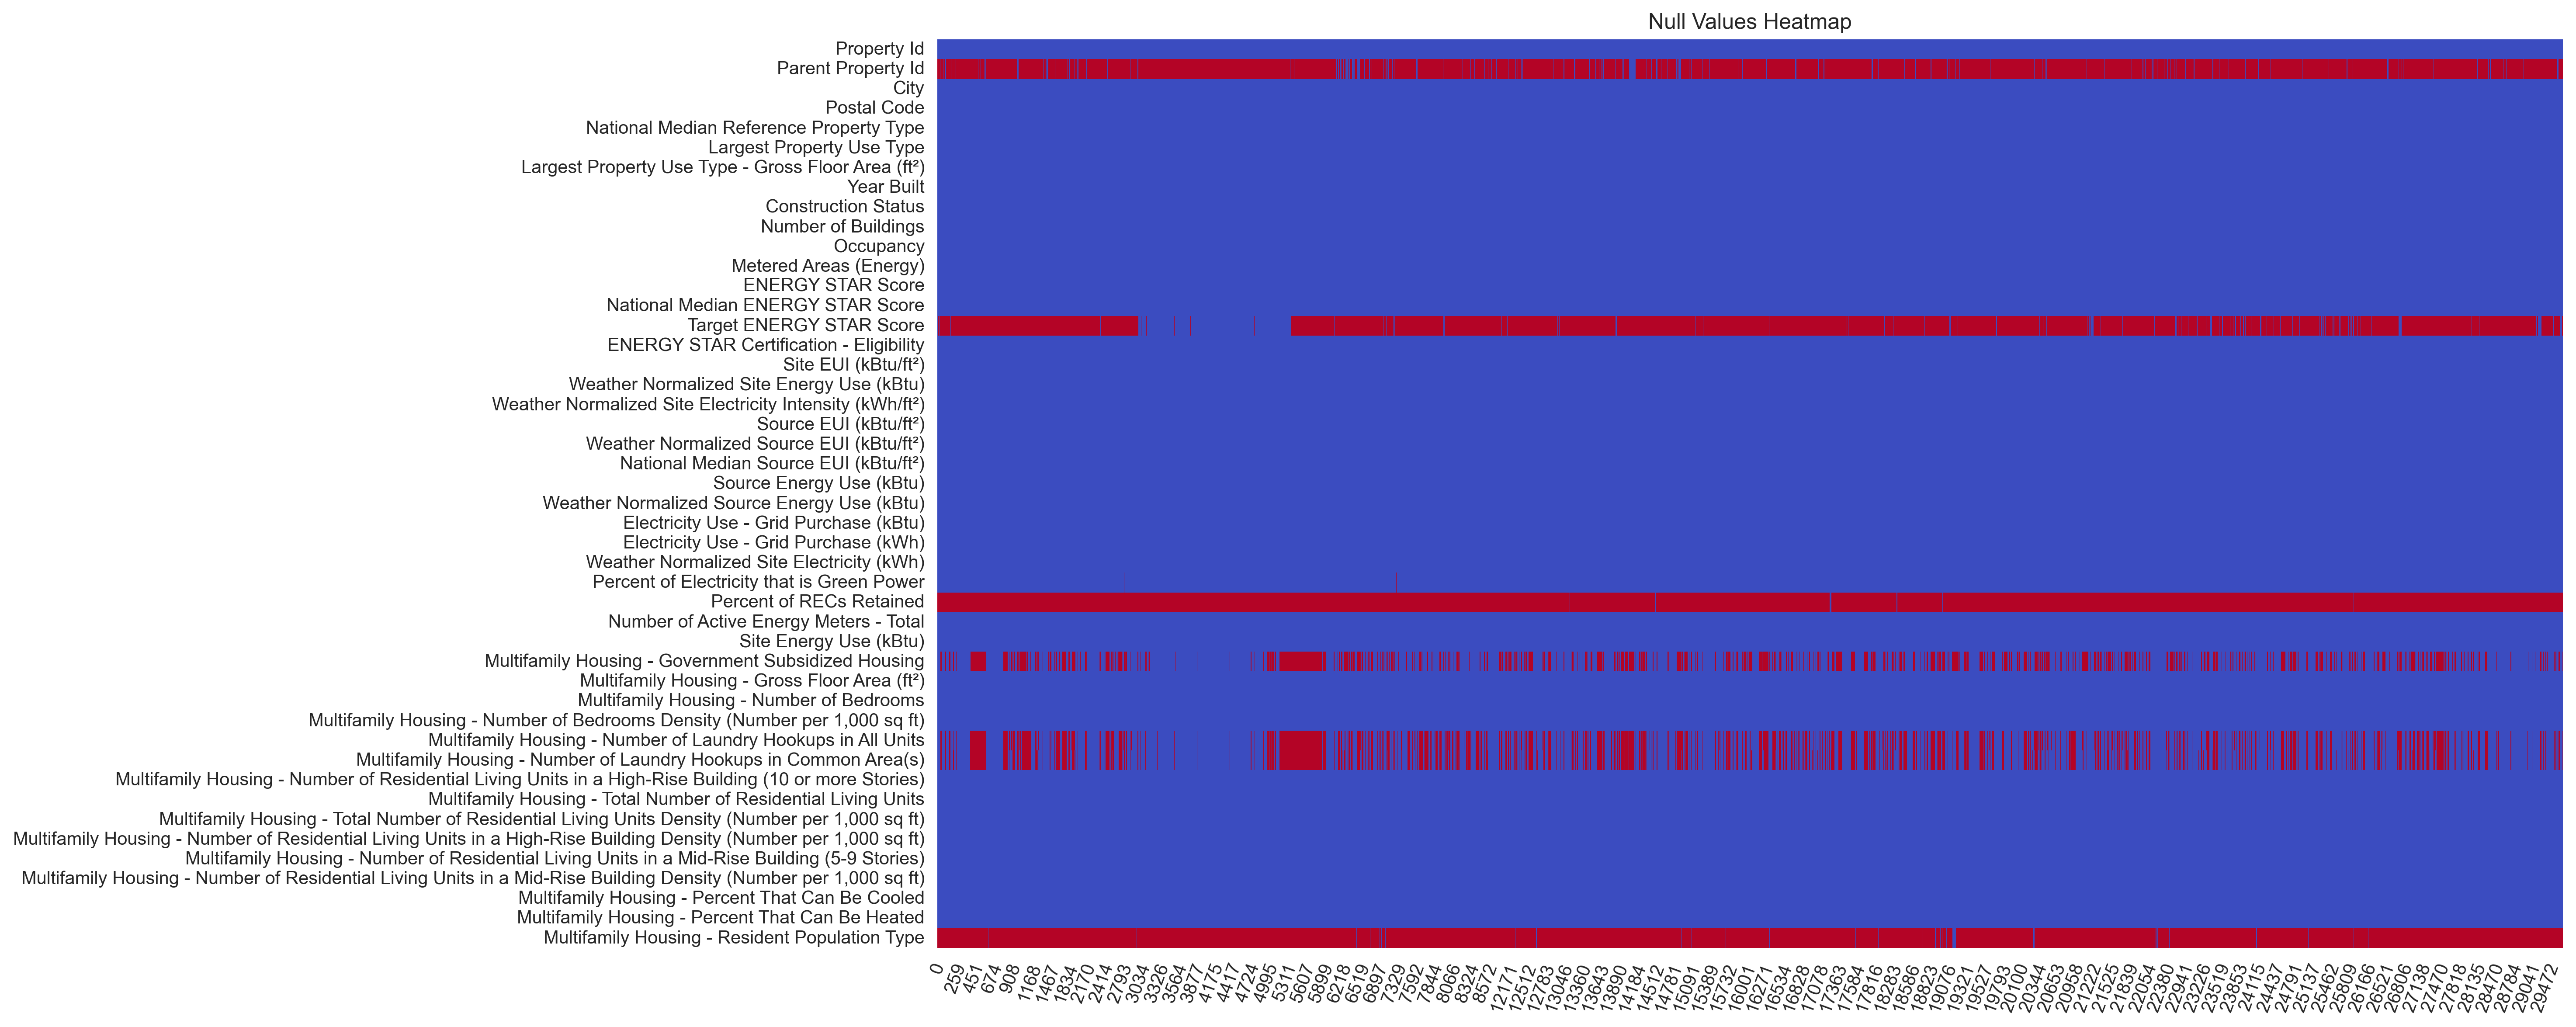

In [ ]:
# Create a heatmap of null values
def null_heatmap():
    plt.figure(figsize=(16, 9), dpi=300)

    sns.heatmap(energy_water_data.isnull().T, cmap='coolwarm', cbar=False)

    plt.xticks(rotation=70)
    plt.title('Null Values Heatmap')
    plt.show()


null_heatmap()

In the null value heatmap above we can see that there are still several columns in our dataset with null values.



Whether a building has laundry hookups installed is likely an important factor in estimating the energy usage of a building, thus we should ensure that all of our rows contain this information. There is no reasonable way to impute these values, considering the fact that some tenants install laundry hookups in their apartments unbeknownst to their landlord. Thus, it is reasonable to simply drop the rows that lack this data.

In [ ]:
energy_water_data.dropna(subset=['Multifamily Housing - Number of Laundry Hookups in All Units',
                                 'Multifamily Housing - Number of Laundry Hookups in Common Area(s)'], inplace=True)

The lack of data for the following columns suggests that they need to be dropped:
 - Parent Property Id
  - Target ENERGY STAR Score
  - Percent of RECs Retained

In [ ]:
energy_water_data.drop(labels=['Parent Property Id',
                               'Percent of RECs Retained',
                               'Target ENERGY STAR Score',
                               'Multifamily Housing - Resident Population Type',
                               ], axis=1,
                       inplace=True)
energy_water_data.shape[0]

10072

Let us address the rows with null values for their government subsidy indicator

In [ ]:
# TODO: Should we drop the rows or should we assume that they are not government subsidized?
energy_water_data.dropna(subset=['Multifamily Housing - Government Subsidized Housing'], inplace=True)
energy_water_data.shape[0]

9258

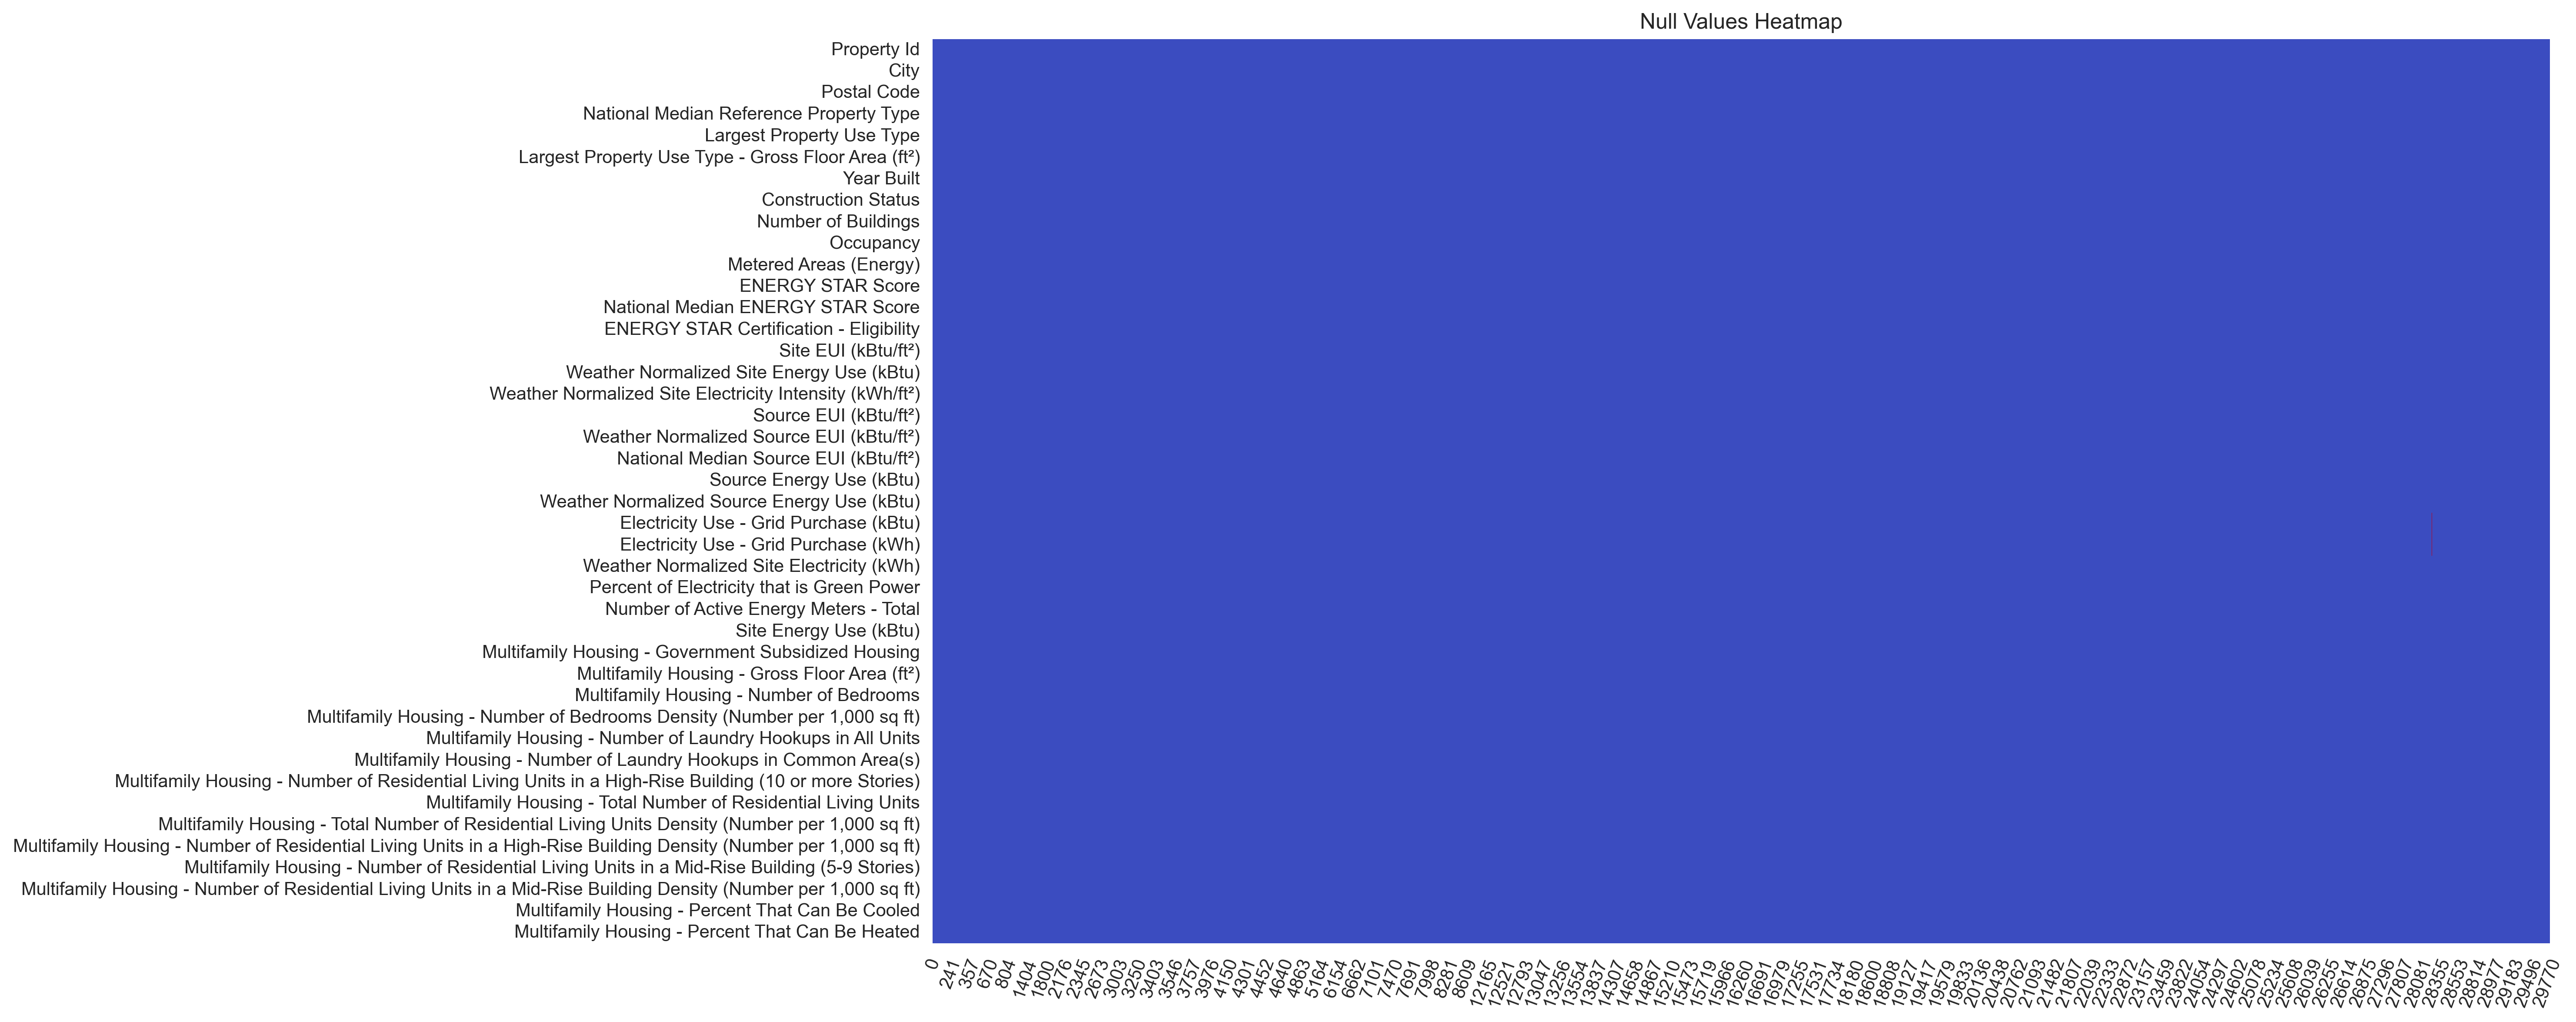

In [ ]:
null_heatmap()

#### Convert columns to their respective data types

Most of the columns should be numeric, so we will separate the non-numeric instead

In [ ]:
energy_water_data.reset_index(inplace=True, drop=True)

In [ ]:
boolean_columns = ['Multifamily Housing - Government Subsidized Housing',
                   'ENERGY STAR Certification - Eligibility']

str_columns = ['Property Id',
               'City',
               'Postal Code',
               'National Median Reference Property Type',
               'Largest Property Use Type',
               'Metered Areas (Energy)',
               'Construction Status',
               ]

energy_water_data_numeric = energy_water_data.drop(boolean_columns, axis=1)
energy_water_data_numeric = energy_water_data_numeric.drop(str_columns, axis=1)

##### Convert to boolean

In [ ]:
for column in boolean_columns:
    energy_water_data[column] = energy_water_data[column].replace(['Yes', '100% Yes'], True)
    energy_water_data[column] = energy_water_data[column].replace(['No'], False)
    energy_water_data[column] = energy_water_data[column].astype(bool)

##### Convert to str

In [ ]:
for column in str_columns:
    energy_water_data[column] = energy_water_data[column].astype(str)

##### Convert to numeric

In [ ]:
for column in energy_water_data_numeric.columns:
    energy_water_data[column] = pd.to_numeric(energy_water_data[column])

In [ ]:
energy_water_data.dtypes

Property Id                                                                                                           object
City                                                                                                                  object
Postal Code                                                                                                           object
National Median Reference Property Type                                                                               object
Largest Property Use Type                                                                                             object
Largest Property Use Type - Gross Floor Area (ft²)                                                                     int64
Year Built                                                                                                             int64
Construction Status                                                                                                   object


#### Clean column data where necessary

##### Not all postal codes in the dataset are in 5-digit format

In [ ]:
energy_water_data[~energy_water_data['Postal Code'].str.contains('^\d{5}$')]['Postal Code']

441         100128
2598        111201
3002        113731
6535    10031-6032
7138     112211760
7376     114342300
7377     112126939
7765     112290523
8040        100037
8173    11385-6201
9058     100381836
9238    10024-3822
9239    10024-3801
9241    10025-3621
Name: Postal Code, dtype: object

In [ ]:
# First drop any columns that do not start with 5 digits
energy_water_data = energy_water_data[energy_water_data['Postal Code'].str.contains('^\d{5}')]


In [ ]:
# Coerce all ZIP codes to 5-digit format
energy_water_data['Postal Code'] = energy_water_data['Postal Code'].str.extract(r'^(\d{5})')

#### **Summary Statistics**
Compute summary statistics for numeric variables (mean, median, min, max, standard deviation, etc.).

Count unique values for categorical variables.


#### **Handle Missing Values**:
Identify and count missing values in the datasets. In this dataset, we should not expect any of the rows to have data for every column.

Therefore, we need to decide on an appropriate strategy to handle missing values (imputation, removal, etc.).

#### **Data Distribution**
Plot histograms or density plots to visualize the distribution of numeric variables.

For categorical variables, create bar plots to visualize the frequency distribution of each category.

#### **Correlation Analysis**
How can we compare pairwise correlations between numeric variables?

It would be nice to visualize correlations using heatmaps or scatter plots, but there are 200+ variables.

#### **Outlier Detection**
Identify outliers in the data using visualization techniques such as box plots or scatter plots.

#### **Data Visualization**
Create some visualizations to explore relationships between variables and identify patterns in the data.

#### **Understand Class Imbalance** (for classification tasks)
Check the distribution of target classes to identify any class imbalances that may need to be addressed during modeling.

#### **Cross-Tabulations and Pivot Tables**
Create cross-tabulations and pivot tables to analyze relationships between categorical variables.

#### **Data Transformation**

Do we want to use normalization or scaling on the dataset?